# ARIMA Exploration
Explore the use of the ARIMA method in a notebook before structured implementation in pipeline.

## Data import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_path ="../datasets/raw/"
raw_categories_data_path = base_path + "solr_categories_2021_11_29.csv"
raw_data_path = base_path+"market_insights_overview_all.csv"
raw_data_51_path = base_path+"market_insights_51_headphones.csv"

### Import and filter
Import all time series data

Fitler out headphones data with id 12840

Save the data to a new file for later import

In [ ]:
# Import all data
all_data = pd.read_csv(raw_data_path)

In [ ]:
# Filter data
cat_id = 51
filtered_data = all_data[all_data.cat_id == cat_id]

In [ ]:
filtered_data.to_csv(raw_data_51_path)

### Import filtered data

In [3]:
# Read raw data
data = pd.read_csv(raw_data_51_path)
categories = pd.read_csv(raw_categories_data_path)

In [4]:
category_data = categories[categories.id == 51]
category_data

,parent,title_no,internal_doc_type,image_url,description,title,title_phonetic,url,tags,path,...,internal_doc_id,popularity,root,alias,title_edge_ngram,id,alias_no,adult,last_modified,parents
1845,Lyd og bilde,Hodetelefoner og ørepropper,category,/2578/2578704/bose-qc-35-7.54x75!m.png,1924 produkter,Hodetelefoner og ørepropper,Hodetelefoner og ørepropper,/kategorier/hodetelefoner-og-oerepropper,products,Lyd og bilde>Hodetelefoner og ørepropper,...,51,107476,Lyd og bilde,"earphones,headphones,headset,headsett høretele...",Hodetelefoner og ørepropper,51,"headset,headsett høretelefoner,earphones,ørepr...",False,2021-11-29T04:01:40.011Z,Lyd og bilde


In [5]:
# Display info of loaded raw time series data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577762 entries, 0 to 577761
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       577762 non-null  int64 
 1   id               577762 non-null  int64 
 2   product_id       577762 non-null  int64 
 3   manufacturer_id  577762 non-null  int64 
 4   cat_id           577762 non-null  int64 
 5   root_cat_id      577762 non-null  int64 
 6   date             577762 non-null  object
 7   hits             577762 non-null  int64 
 8   clicks           577762 non-null  int64 
 9   last_modified    577762 non-null  object
dtypes: int64(8), object(2)
memory usage: 44.1+ MB


## Group filtered data as one class

In [6]:
category_data = data.groupby(["cat_id", "date"], as_index=False).sum()
# Filter away early 2018 data as it seems to contain errors
category_data = category_data.loc[category_data['date'] > '2018-12-01']

In [7]:
# Display info of loaded raw time series data
category_data.head()
category_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 120 to 1136
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cat_id           1017 non-null   int64 
 1   date             1017 non-null   object
 2   Unnamed: 0       1017 non-null   int64 
 3   id               1017 non-null   int64 
 4   product_id       1017 non-null   int64 
 5   manufacturer_id  1017 non-null   int64 
 6   root_cat_id      1017 non-null   int64 
 7   hits             1017 non-null   int64 
 8   clicks           1017 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 79.5+ KB


## Visualize data
Graph to visualize the data

(<AxesSubplot:title={'center':'category: Headphones'}, xlabel='date'>,
 'lineplot_51_headphones')

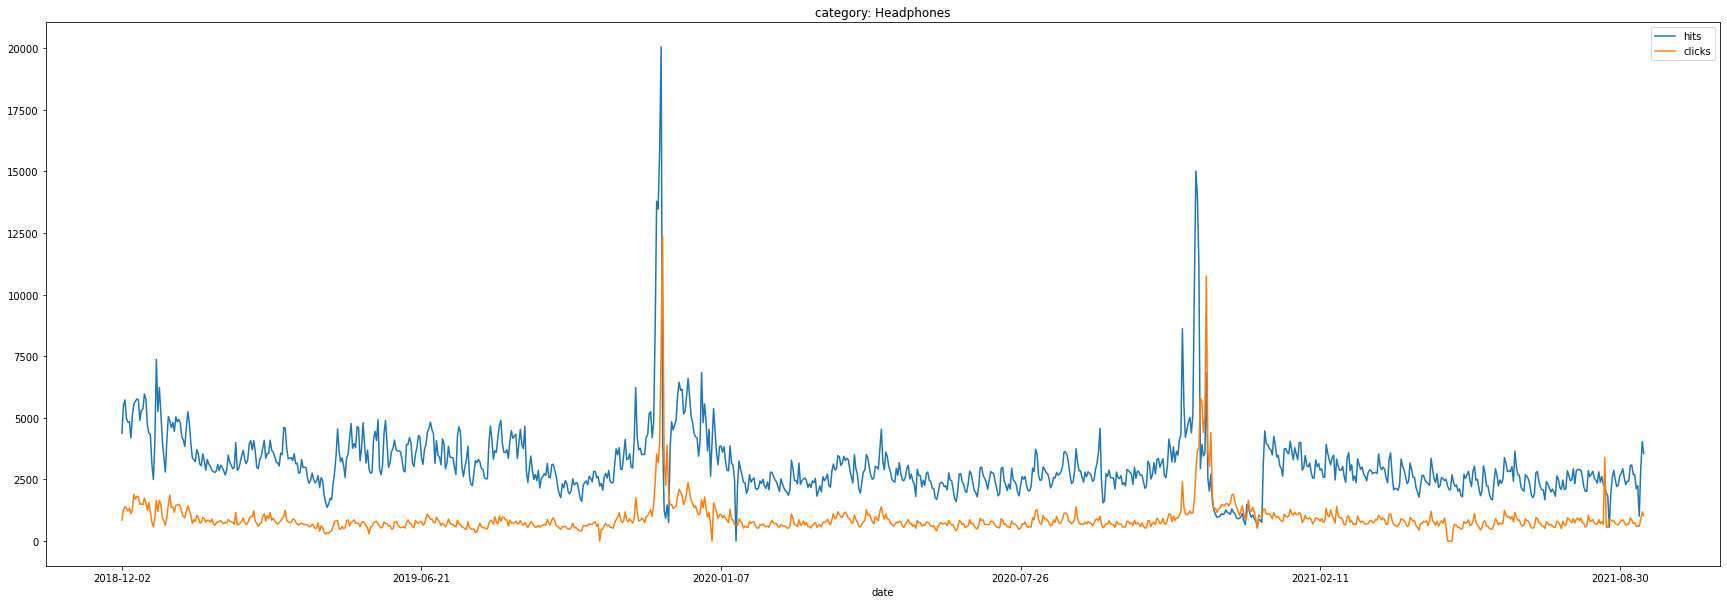

In [8]:
category_data.plot(
    x="date",
    y=["hits", "clicks"],
    title=f"category: Headphones",
    figsize=(30, 10),
),f"lineplot_51_headphones"

<AxesSubplot:>

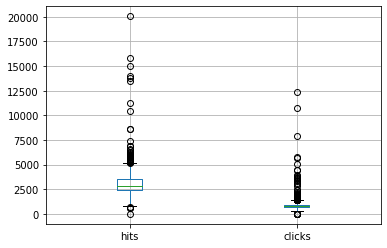

In [9]:
category_data.boxplot(column=["hits", "clicks"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

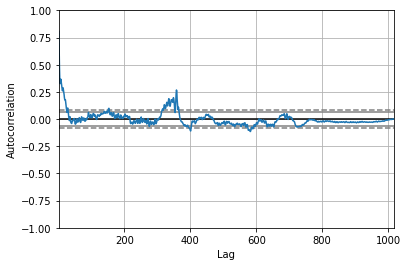

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(category_data["hits"])

# ARIMA

## Initial fit on entire time series

In [11]:
from statsmodels.tsa.arima.model import ARIMA

from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot

# Reduce data to 100 data-points for to validate the models runs
hits_data_series = category_data["hits"][:100]
clicks_data_series = category_data["clicks"][:100]

/tmp/ipykernel_17762/409853696.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [12]:
# Create model, data -> hits
model = ARIMA(
    hits_data_series,
    order=(5,1,0)
)
# Fit model
model_fit = model.fit()

/home/sanderkk/dev/school/fordypning/Masteroppgave/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/sanderkk/dev/school/fordypning/Masteroppgave/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/sanderkk/dev/school/fordypning/Masteroppgave/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [13]:
# Model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   hits   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -774.434
Date:                Fri, 24 Dec 2021   AIC                           1560.869
Time:                        15:14:38   BIC                           1576.439
Sample:                             0   HQIC                          1567.169
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1866      0.061     -3.054      0.002      -0.306      -0.067
ar.L2         -0.2462      0.081     -3.045      0.002      -0.405      -0.088
ar.L3         -0.2563      0.110     -2.341      0.019      -0.471      -0.042
ar.L4         -0.2752      0.110     -2.508      0.012      -0.490      -0.060
ar.L5         -0.2246      0.081     -2.767      0.006      -0.384      -0.066
sigma2      3.628e+05   2.82e+04     12.866      0.000    3.08e+05    4.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               177.48
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

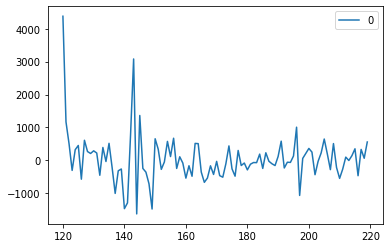

In [14]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

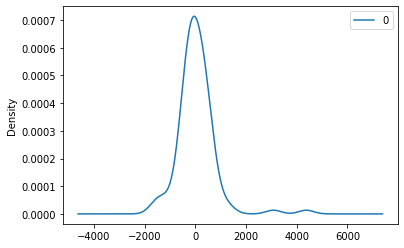

In [15]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [16]:
# summary stats of residuals
residuals.describe()

,0
count,100.000000
mean,40.479897
std,746.563156
min,-1624.384990
25%,-282.021571
50%,-40.142137
75%,327.559678
max,4377.000000


## Prediction

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
# Select number of data points
nr_datapoints = 400

# Training and testing set
training_set = category_data["hits"][:nr_datapoints]
training_set = training_set.reset_index(drop=True)

In [19]:
training_set

0      4377
1      5481
2      5729
3      4994
4      4821
       ... 
395    5373
396    4456
397    3562
398    3100
399    3841
Name: hits, Length: 400, dtype: int64

In [20]:
# ARIMA
# Create model, data -> hits
model = ARIMA(
    training_set,
    order=(1,1,1)
)
# Fit model
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   hits   No. Observations:                  400
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3340.974
Date:                Fri, 24 Dec 2021   AIC                           6687.948
Time:                        15:14:39   BIC                           6699.915
Sample:                             0   HQIC                          6692.688
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7730      0.011     68.019      0.000       0.751       0.795
ma.L1         -0.9990      0.053    -18.893      0.000      -1.103      -0.895
sigma2      1.088e+06   5.78e+04     18.823      0.000    9.74e+05     1.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.25   Jarque-Bera (JB):             46715.27
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               8.00   Skew:                            -2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

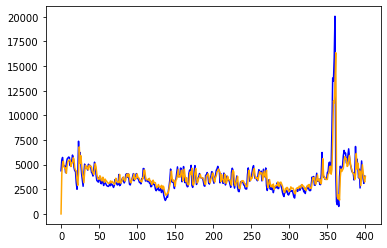

In [21]:
prediction_set = model_fit.predict(0,nr_datapoints)

plt.plot(training_set, 'blue')
plt.plot(prediction_set, 'orange')
plt.show()